# Rossmann Tabular Regression


Rossmann's Kaggle competition was a business sales prediction competition for $35,000 dollars to the winners.

The premise is that we're given the sales data and information of their stores for the past few years. We need to make a model that can predict the number of sales that will be made in the future.

We can do this through a tabular regression model.

To download the dataset:<br>
- Go to https://www.kaggle.com/init27/fastai-v3-rossman-data-clean<br>
- Go to `output`<br>
- Right click the download button<br>
- Copy link location (both train and test)<br>
- !wget `<link>`

The following links might be expired

In [1]:
!wget https://www.kaggleusercontent.com/kf/10297001/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..Z9DPUqy_7o3hN9iBl-fUzw.wOI0rTH6_gyvR8U-UvMUmoTD9M2lafDXDSEYKY0DmHkgI1gLabCyG4vgnAiFUs1ksHeHaKuid_NXg-RrSV2fldd61Isp0HU-qE5EWhFYiAb9UrofumKeeBfu0RcnMV0WtyVJqNi8yQtwym3Z_UJPSdMNGkavYNacFSrSQbCDQpQ986sbdZdF0ZaAasu-oOjA.8mQMhFGKkxrPLzAvIL6XVA/train_clean
!wget https://www.kaggleusercontent.com/kf/10297001/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..PkPJUP4dpHeJA15qLhTNUg.jhtsT6LQCC_SNy6-vBju-HlWEymYS4CxJJVhxGSgLBimmyNirL5Fh1_NB6PGSR13uMX3bsc6x47_eD550vkWTQLfRZjpyc9v5Q3U3J1EmaSOeMb5Tdip_ONpbPwzyKHgBwKJB4yAbV6aZzEcSJdNlFbZx6PtoVjt-tCOlZ0O0fi0o1we9DYpUGJOtbiaTAeL.msgJPMSJo2PW83rmkClroA/test_clean

--2019-12-05 22:23:32--  https://www.kaggleusercontent.com/kf/10297001/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..Z9DPUqy_7o3hN9iBl-fUzw.wOI0rTH6_gyvR8U-UvMUmoTD9M2lafDXDSEYKY0DmHkgI1gLabCyG4vgnAiFUs1ksHeHaKuid_NXg-RrSV2fldd61Isp0HU-qE5EWhFYiAb9UrofumKeeBfu0RcnMV0WtyVJqNi8yQtwym3Z_UJPSdMNGkavYNacFSrSQbCDQpQ986sbdZdF0ZaAasu-oOjA.8mQMhFGKkxrPLzAvIL6XVA/train_clean
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kaggleusercontent.com (www.kaggleusercontent.com)|35.190.26.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 497095620 (474M) [application/octet-stream]
Saving to: ‘train_clean’

train_clean         100%[===================>] 474.07M   143MB/s    in 3.3s    

2019-12-05 22:23:35 (143 MB/s) - ‘train_clean’ saved [497095620/497095620]

--2019-12-05 22:23:36--  https://www.kaggleusercontent.com/kf/10297001/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..PkPJUP4dpHeJA15qLhTNUg.jhtsT6LQCC_SNy6-vBju-H

Let's reinstall the library like usual

In [0]:
#import os
#!pip install -q torch torchvision feather-format kornia pyarrow Pillow wandb nbdev fastprogress --upgrade 
#!pip install -q git+https://github.com/fastai/fastcore  --upgrade
#!pip install -q git+https://github.com/fastai/fastai2 --upgrade
#os._exit(00)

     |████████████████████████████████| 122kB 2.9MB/s 
     |████████████████████████████████| 59.2MB 43.8MB/s 
     |████████████████████████████████| 2.1MB 35.3MB/s 
     |████████████████████████████████| 1.3MB 42.9MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 460kB 44.7MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
     |████████████████████████████████| 256kB 53.6MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 184kB 52.0MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


Now let's grab the libraries we used when we did `03a`

In [0]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.tabular.all import *

# Time-Series Analysis

In [0]:
!ls

sample_data  test_clean  train_clean


In [0]:
train_df = pd.read_pickle('train_clean')

In [0]:
train_df.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State,file,week,trend,file_DE,week_DE,trend_DE,Date_DE,...,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,CompetitionOpenSince,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Since,Promo2Days,Promo2Weeks,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,0,1,5,2015-07-31,5263,555,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,a,1270.0,9,2008,0,1,1900,NaN,HE,Rossmann_DE_HE,2015-08-02 - 2015-08-08,85,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,...,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,NaN,0.0,1.0,Fog,13,Hessen,2008-09-15,2510,24,1900-01-01,0,0,0,0,57,0,0,0,5.0,0.0,5.0,7.0,0.0,5.0
1,1,2,5,2015-07-31,6064,625,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",TH,Rossmann_DE_TH,2015-08-02 - 2015-08-08,80,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,...,13,7,9,6,3,100,62,25,1021,1019,1017,10.0,10.0,10.0,14,11,NaN,0.0,4.0,Fog,309,Thueringen,2007-11-15,2815,24,2010-03-29,1950,25,0,0,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,2,3,5,2015-07-31,8314,821,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",NW,Rossmann_DE_NW,2015-08-02 - 2015-08-08,86,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,...,13,6,10,7,4,100,61,24,1022,1019,1017,31.0,14.0,10.0,14,5,NaN,0.0,2.0,Fog,354,NordrheinWestfalen,2006-12-15,3150,24,2011-04-04,1579,25,0,0,57,0,0,0,5.0,0.0,5.0,5.0,0.0,5.0
3,3,4,5,2015-07-31,13995,1498,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,c,620.0,9,2009,0,1,1900,NaN,BE,Rossmann_DE_BE,2015-08-02 - 2015-08-08,74,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,...,14,9,9,7,4,94,61,30,1019,1017,1014,10.0,10.0,10.0,23,16,NaN,0.0,6.0,NaN,282,Berlin,2009-09-15,2145,24,1900-01-01,0,0,0,0,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,4,5,5,2015-07-31,4822,559,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,29910.0,4,2015,0,1,1900,NaN,SN,Rossmann_DE_SN,2015-08-02 - 2015-08-08,82,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,...,15,10,8,6,5,82,55,26,1020,1018,1016,10.0,10.0,10.0,14,11,NaN,0.0,4.0,NaN,290,Sachsen,2015-04-15,107,3,1900-01-01,0,0,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0


In [0]:
n = len(train_df); n

844338

That's a lot! Let's start with a sample

## Subset Experimentation

Generate some random numbers to make our subset of 2000

In [0]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()

In [0]:
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]

In [0]:
len(small_test_df.columns)

93

In [0]:
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars = ['Store', 'DayOfWeek', 'PromoInterval']

In [0]:
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [0]:
len(small_train_df.columns)

6

Now let's look at how the processes we set are used

In [0]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
2038,928,4,"Feb,May,Aug,Nov",1090.0,73,9686
2934,710,3,"Jan,Apr,Jul,Oct",1500.0,77,5390
3389,51,2,"Jan,Apr,Jul,Oct",10570.0,55,7847
3983,646,2,NaN,620.0,55,6018
3987,650,2,"Jan,Apr,Jul,Oct",1420.0,55,7432


In [0]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [0]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
2038,928,4,"Feb,May,Aug,Nov",1090.0,73,9686
2934,710,3,"Jan,Apr,Jul,Oct",1500.0,77,5390
3389,51,2,"Jan,Apr,Jul,Oct",10570.0,55,7847
3983,646,2,NaN,620.0,55,6018
3987,650,2,"Jan,Apr,Jul,Oct",1420.0,55,7432


In [0]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [0]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [0]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
2038,928,4,"Feb,May,Aug,Nov",1090.0,73,9686,False
2934,710,3,"Jan,Apr,Jul,Oct",1500.0,77,5390,False
3389,51,2,"Jan,Apr,Jul,Oct",10570.0,55,7847,False
3983,646,2,NaN,620.0,55,6018,False
3987,650,2,"Jan,Apr,Jul,Oct",1420.0,55,7432,False


## Let's use the full dataset

In [0]:
train_df = pd.read_pickle('train_clean')
test_df = pd.read_pickle('test_clean')

In [3]:
len(train_df),len(test_df)

(844338, 41088)

In [0]:
procs=[FillMissing, Categorify, Normalize]

In [0]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw', 'Promo', 'SchoolHoliday']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday']
dep_var = 'Sales'

In [0]:
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

In [0]:
df.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_fw,StateHoliday_bw,SchoolHoliday_fw,SchoolHoliday_bw,Promo,SchoolHoliday,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Sales,Date
0,1,5,2015,7,31,False,24,0,c,a,NaN,2008,1900,HE,31,Fog,5.0,5.0,0.0,0.0,7.0,5.0,1,1,1270.0,23,16,8,98,54,18,24,11,1.0,85,83,57,0,5263,2015-07-31
1,2,5,2015,7,31,False,24,25,a,a,"Jan,Apr,Jul,Oct",2007,2010,TH,31,Fog,1.0,5.0,0.0,0.0,1.0,5.0,1,1,570.0,19,13,7,100,62,25,14,11,4.0,80,83,67,0,6064,2015-07-31
2,3,5,2015,7,31,False,24,25,a,a,"Jan,Apr,Jul,Oct",2006,2011,NW,31,Fog,5.0,5.0,0.0,0.0,5.0,5.0,1,1,14130.0,21,13,6,100,61,24,14,5,2.0,86,83,57,0,8314,2015-07-31
3,4,5,2015,7,31,False,24,0,c,c,NaN,2009,1900,BE,31,NaN,1.0,5.0,0.0,0.0,1.0,5.0,1,1,620.0,19,14,9,94,61,30,23,16,6.0,74,83,67,0,13995,2015-07-31
4,5,5,2015,7,31,False,3,0,a,a,NaN,2015,1900,SN,31,NaN,1.0,5.0,0.0,0.0,1.0,5.0,1,1,29910.0,20,15,10,82,55,26,14,11,4.0,82,83,57,0,4822,2015-07-31


In [7]:
len(train_df.columns), len(df.columns)

(93, 40)

Ensure we have the same date ranges

In [8]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [9]:
train_df['Date'].min(), train_df['Date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

When we create the dataset, we want to split the validation set evenly at the line between two dates while having a validation set at least the size of the test set.

To do this, we want to get the length of the test set,<br>
find the date in the train set at that index,<br>
and finally pull the index of the last occurance of that date.

In [10]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index
cut

Int64Index([40282, 40283, 40284, 40285, 40286, 40287, 40288, 40289, 40290,
            40291,
            ...
            41386, 41387, 41388, 41389, 41390, 41391, 41392, 41393, 41394,
            41395],
           dtype='int64', length=1114)

In [0]:
valid_idx = cut.values

Lastly let's pre-process our y values to their log

In [0]:
train_df[dep_var] = np.log(train_df[dep_var])

<h3>Create our DataBunch!</h3>

Let's look at how we would create our `PipeLine`. As before, I've included the 1.0 code for a direct comparison

In [0]:
### DO NOT RUN! JUST FOR SHOW OF HOW THE 1.0 API LOOKED ###
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names = cont_vars, procs=procs)
       .split_by_idx(valid_idx)
       .label_from_df(cols=dep_var, label_cls=FloatList, log=True) # Ensures regression task
       .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
       .databunch())

We'll split using an `IndexSplitter`, passing in our `val_idx` like before

In [0]:
splits = IndexSplitter(valid_idx)(range_of(train_df))

Now let's create our `TabularPandas` object! All we have to do is pass in a blank `TransformBlock()` to `block_y` and we're good to go!

In [0]:
to = TabularPandas(train_df, procs=procs, cat_names=cat_vars, cont_names=cont_vars,
                   y_names=dep_var, block_y=TransformBlock(), splits=splits)

Lastly we just need to make our `DataBunch`, and declare how many classes we have (one because it is regression)

In [0]:
dbunch = to.databunch(bs=512)

In [0]:
dbunch.c = 1

<h3> Now let's make our model </h3>

Since we want the log, we need to dictate what our max_log of the y value actually is

In [20]:
max_log_y = np.log(1.2) + np.max(train_df['Sales']); max_log_y

10.816998424176623

In [21]:
y_range = (0, max_log_y); y_range

(0, 10.816998424176623)

Now here is something else that is new. Our `tabular_learner` can take in a configuration for hyper-parameters inside our model. These are items like `ps`, `embed_p`, `y_range`, `use_bn`, and `bn_final`

In [24]:
config = tabular_config(ps=[0.001, 0.01], embed_p=0.04); config

{'embed_p': 0.04, 'ps': [0.001, 0.01]}

For now, we also need to include our loss function, in our case this is `MSELossFlat`

In [0]:
learn = tabular_learner(dbunch, layers=[1000,500], metrics=exp_rmspe, config=config,
                        loss_func=MSELossFlat())

So we have a lot going on right there. ps is dropout (helps with overfitting), emb_drop is dropout on the embedding weights, exp_rmspe is Root Mean Square Percentage Error

In [0]:
exp_rmspe??

In [31]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
    (24): Embedding(3, 3)
    (25): Embedding(2, 2)
    (26): Embedding(2, 2)
    (27): Embedding(2, 2)
    (28): Embedding(2, 2)
    (29): Embedding(2, 2)
    (30): Embedding(2, 2)
    (31): Embedding(2, 2)
    (32): Embedding(2, 2)
    (33): Embedding(3, 3)
    (34): Embedding(2, 2)
    (35): Embedding(2, 2)
    (36): Embedding(

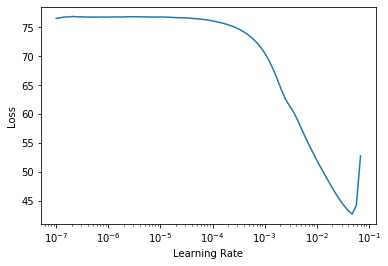

In [40]:
learn.lr_find()

In [41]:
learn.fit_one_cycle(5, 3e-3, wd=0.2)

epoch,train_loss,valid_loss,_exp_rmspe,time
0,0.078117,0.074262,0.328815,01:01
1,0.041591,0.013518,0.111638,01:01
2,0.026212,0.018064,0.145526,01:01
3,0.015085,0.017072,0.143891,01:01
4,0.011016,0.017971,0.147311,01:01


# Test Predictions (Kaggle Competition)

Now that we have a model, we want to make our final competitions that would be submitted to a competition, as such, we can only make the predictions and submit them as a CSV.

First, we need to tell the learner to return the predictions for the test set we added

In [0]:
raw_test_preds=learn.get_preds(DatasetType.Test)
raw_test_preds[0].data

tensor([[ 8.3466],
        [ 8.8626],
        [ 9.1010],
        ...,
        [ 8.8481],
        [10.0674],
        [ 8.9271]])

Now that we have the raw predicted values, we need to convert them into usable numbers since we predicted on natural logged values.<br>
prediction = e^(raw_prediction)

In [0]:
test_preds = np.exp(raw_test_preds[0].data).numpy().T[0]
test_preds

array([ 4215.7764,  7062.9995,  8964.55  ,  6536.999 , ...,  7465.181 ,  6961.467 , 23561.684 ,  7533.5103],
      dtype=float32)

Because test sets should be representative of the train set, the predicted ranges should be roughly similar<br>and because of the max log y, the max of the test should only be a bit larger than the train set. (note that the test max is 1.2 times larger, just like we set)

In [0]:
train_df['Sales'].min(), train_df['Sales'].max()

(46, 41551)

In [0]:
test_preds.min(), test_preds.max()

(1.0001862, 49861.156)

With our new predictions, we want to put the new predictions with the data rounded to an integer and made into a CSV for competition submission.

The Kaggle submission just contains the ID and the sales prediction

In [0]:
test_df["Sales"]=test_preds
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)

# Data cleaning and Feature Engineering

I won't go over this in class, but I follow this notebook:

https://github.com/fastai/course-v3/blob/master/nbs/dl1/rossman_data_clean.ipynb

In [0]:
dPath = Path('gdrive/My Drive/AIRG Officer Folder/2018-19/Coursework/Fast.AI/Week 4/Rossmann_Data')

In [0]:
from fastai.basics import *
import tarfile

First we need to untar the data

In [0]:
tar = tarfile.open(dPath/'rossmann.tgz')
tar.extractall(path=dPath)
tar.close()

In [0]:
table_names = ['train', 'store', 'store_states', 'state_names', 'googletrend', 'weather', 'test']
tables = [pd.read_csv(dPath/f'{fname}.csv', low_memory=False) for fname in table_names]
train, store, store_states, state_names, googletrend, weather, test = tables
len(train),len(test)

(1017209, 41088)

In [0]:
train.StateHoliday = train.StateHoliday!='0'
test.StateHoliday = test.StateHoliday!='0'

In [0]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [0]:
weather = join_df(weather, state_names, "file", "StateName")

In [0]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'

In [0]:
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [0]:
add_datepart(weather, "Date", drop=False)
add_datepart(googletrend, "Date", drop=False)
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)

In [0]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

In [0]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

In [0]:
joined = join_df(train, store, "Store")
joined_test = join_df(test, store, "Store")
len(joined[joined.StoreType.isnull()]),len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

In [0]:
joined = join_df(joined, googletrend, ["State","Year", "Week"])
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])
len(joined[joined.trend.isnull()]),len(joined_test[joined_test.trend.isnull()])

(0, 0)

In [0]:
joined = joined.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()]),len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

In [0]:
joined = join_df(joined, weather, ["State","Date"])
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()]),len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [0]:
for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns: df.drop(c, inplace=True, axis=1)

In [0]:
for df in (joined,joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

In [0]:
for df in (joined,joined_test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                     month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

In [0]:
for df in (joined,joined_test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [0]:
for df in (joined,joined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined.CompetitionMonthsOpen.unique()

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5])

In [0]:
!pip install isoweek

In [0]:
from isoweek import Week
for df in (joined,joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(
        x.Promo2SinceYear, x.Promo2SinceWeek).Tuesday(), axis=1))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

In [0]:
for df in (joined,joined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

In [0]:
PATH = dPath

In [0]:
joined.to_pickle(PATH/'joined')
joined_test.to_pickle(PATH/'joined_test')

In [0]:
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

In [0]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [0]:
df = train[columns].append(test[columns])

In [0]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
df = df.set_index("Date")

In [0]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

In [0]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

In [0]:
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

In [0]:
fwd = df[['Store']+columns].sort_index(ascending=False
                                      ).groupby("Store").rolling(7, min_periods=1).sum()

In [0]:
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

In [0]:
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)

In [0]:
df.reset_index(inplace=True)

In [0]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [0]:
df.drop(columns,1,inplace=True)

In [0]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-09-17,1,13,0,105,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,2015-09-16,1,12,0,104,0,0,0,0.0,0.0,3.0,0.0,0.0,2.0
2,2015-09-15,1,11,0,103,0,0,0,0.0,0.0,2.0,0.0,0.0,3.0
3,2015-09-14,1,10,0,102,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
4,2015-09-13,1,9,0,101,0,9,-1,0.0,0.0,0.0,0.0,0.0,4.0


In [0]:
df.to_pickle(PATH/'df')

In [0]:
df["Date"] = pd.to_datetime(df.Date)

In [0]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [0]:
joined = pd.read_pickle(PATH/'joined')
joined_test = pd.read_pickle(PATH/f'joined_test')

In [0]:
joined = join_df(joined, df, ['Store', 'Date'])

In [0]:
joined_test = join_df(joined_test, df, ['Store', 'Date'])

In [0]:
joined = joined[joined.Sales!=0]

In [0]:
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

In [0]:
joined.to_pickle(savePath/'train_clean')
joined_test.to_pickle(savePath/'test_clean')